In [166]:
import pickle
import tensorflow as tf
from tensorflow.python import  keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Input, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPool2D
from tensorflow.python.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

from sklearn.model_selection import train_test_split

In [185]:
with open("train.pkl","rb") as infile:
    (X, y) = pickle.load(infile)

In [186]:
X = X.reshape(30134,56,56,1)
y = y.ravel()

In [162]:
X_train.shape

(24107, 56, 56, 1)

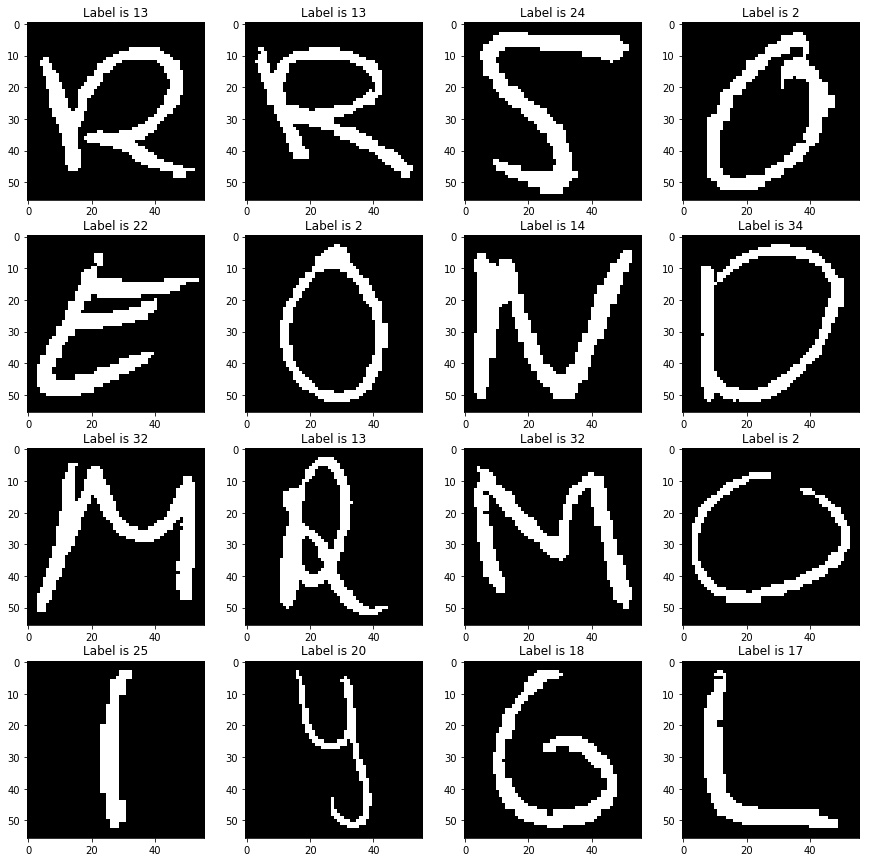

In [187]:
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

random_indices = np.random.randint(0, X_train.shape[0], size=16)

fig = plt.figure(figsize=(15,15))
for i, ridx in enumerate(random_indices):
    fig.add_subplot(4,4,i+1)
    plt.title('Label is {label}'.format(label=y_train[ridx]))
    plt.imshow(X_train[ridx,:,:,0], cmap='gray')
plt.show()

In [188]:
num_classes =36 

X_train = X_train.astype('uint8')
X_test = X_test.astype('uint8')

X_train_fc = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_fc = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Fully connected model

In [96]:
epochs = 30

model_do = Sequential()
model_do.add(Dropout(0.2, input_shape=(3136,)))
model_do.add(Dense(512, activation='relu'))
model_do.add(Dropout(0.5))
model_do.add(Dense(512, activation='relu'))
model_do.add(Dropout(0.5))
model_do.add(Dense(num_classes, activation='softmax'))


model_do.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [99]:
y_train.shape

(24107, 36)

In [101]:
model_do.fit(X_train_fc, y_train,
                    batch_size=128,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_fc, y_test))
score_do = model_do.evaluate(X_test_fc, y_test, verbose=0)

print('Test loss: {:.6f}'.format(score_do[0]))
print('Test accuracy: {:.2f} %'.format(score_do[1]*100))


Train on 24107 samples, validate on 6027 samples
Epoch 1/30
24107/24107 [==============================] - 6s 240us/step - loss: 0.4478 - acc: 0.8618 - val_loss: 0.4005 - val_acc: 0.8824
Epoch 2/30
24107/24107 [==============================] - 6s 238us/step - loss: 0.4112 - acc: 0.8722 - val_loss: 0.3662 - val_acc: 0.8915
Epoch 3/30
24107/24107 [==============================] - 6s 268us/step - loss: 0.3839 - acc: 0.8808 - val_loss: 0.3608 - val_acc: 0.8960
Epoch 4/30
24107/24107 [==============================] - 6s 239us/step - loss: 0.3548 - acc: 0.8903 - val_loss: 0.3601 - val_acc: 0.8946
Epoch 5/30
24107/24107 [==============================] - 6s 246us/step - loss: 0.3364 - acc: 0.8978 - val_loss: 0.3734 - val_acc: 0.9003
Epoch 6/30
24107/24107 [==============================] - 6s 260us/step - loss: 0.3184 - acc: 0.9006 - val_loss: 0.3640 - val_acc: 0.8976
Epoch 7/30
24107/24107 [==============================] - 6s 242us/step - loss: 0.3024 - acc: 0.9039 - val_loss: 0.3549 - v

## Convolution model

In [182]:
epochs = 30

model_cnn = Sequential()
model_cnn.add(Conv2D(filters=16,kernel_size=(3,3),data_format="channels_last",input_shape=(56,56, 1,)))
#model_cnn.add(Dropout(0.5))
model_cnn.add(MaxPool2D(pool_size=(2,2),data_format="channels_last"))
model_cnn.add(Conv2D(filters=32,kernel_size=(3,3),data_format="channels_last"))
#model_cnn.add(Dropout(0.5))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Conv2D(filters=64,kernel_size=(3,3),data_format="channels_last"))
#model_cnn.add(Dropout(0.5))
model_cnn.add(MaxPool2D(pool_size=(3,3),data_format="channels_last"))
model_cnn.add(Flatten())
model_cnn.add(Dense(num_classes, activation='softmax'))

EStop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model_cnn.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [183]:
model_cnn.fit(X_train, y_train,
                    batch_size=128,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                callbacks=[EStop])
score_do = model_cnn.evaluate(X_test, y_test, verbose=0)

print('Test loss: {:.6f}'.format(score_do[0]))
print('Test accuracy: {:.2f} %'.format(score_do[1]*100))

ValueError: Error when checking input: expected conv2d_51_input to have 4 dimensions, but got array with shape (24107, 56, 56)